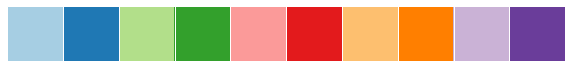

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit, fsolve


sns.set(color_codes = True)
cmap = sns.color_palette("Paired", 10)
% matplotlib inline
sns.palplot(cmap)

In [2]:
f3p4 = pd.read_csv('200416\\200416_glass_R56_power_dep_f3p4.txt', sep = ' ');
f15 =  pd.read_csv('200416\\200416_glass_R56_power_dep_f15.txt', sep = ' ');
f30 = pd.read_csv('200416\\200416_glass_R56_power_dep_f30.txt', sep = ' ');
f50 = pd.read_csv('200416\\200416_glass_R56_power_dep_f50.txt', sep = ' ');

In [3]:
R56 = 40.2
Rref = 39.4

In [4]:
array = [f3p4, f15, f30, f50]

In [5]:
freq = [3.4, 15, 30, 50]
for i in range(0, len(array)):
    array[i]['I1w'] = array[i]['X1'] / R56
    array[i]['Freq'] = freq[i]

In [6]:
#data for subplot 1,1
p = np.polyfit(array[i]['I1w'][5:-2]**3,array[i]['X3'][5:-2],1)
x = np.concatenate(([0],np.array(array[i]['I1w'][5:-2])))


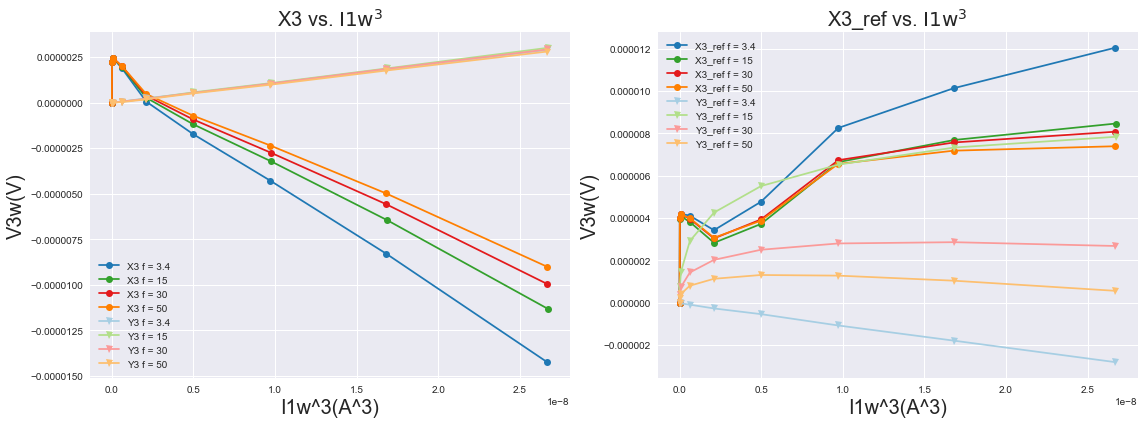

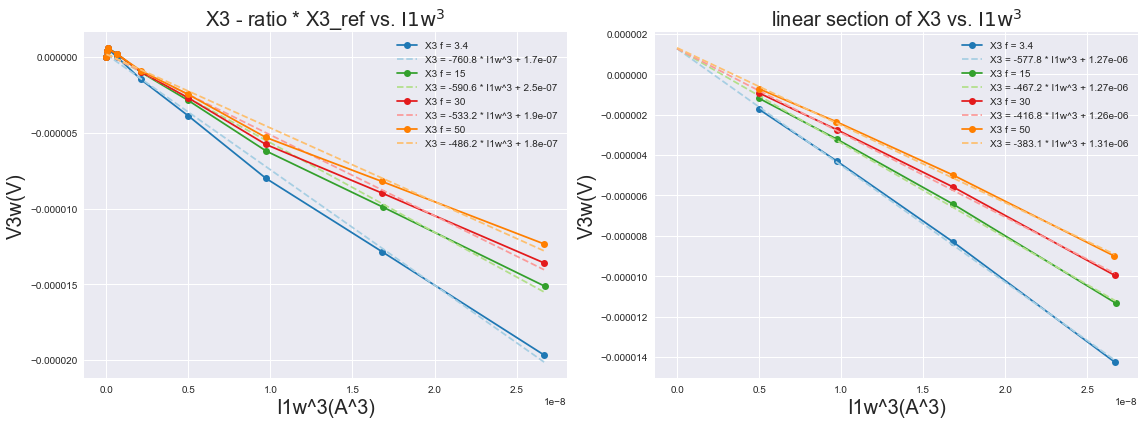

In [7]:
f,axs = plt.subplots(1,2,figsize = (16,6))
for i in range(0, len(array)):
    axs[0].plot(array[i]['I1w'][0:-2]**3, array[i]['X3'][0:-2], 
                  marker = 'o', label = f"X3 f = {freq[i]}", c = cmap[i * 2 + 1])
for i in range(0, len(array)):
    axs[0].plot(array[i]['I1w'][0:-2]**3, array[i]['Y3'][0:-2], 
                  marker = 'v', label = f"Y3 f = {freq[i]}", c = cmap[i * 2])
axs[0].legend()
axs[0].set_xlabel('I1w^3(A^3)', fontsize = 20)
axs[0].set_ylabel('V3w(V)', fontsize = 20)
axs[0].set_title(r'X3 vs. $\rm{I1w}^3$', fontsize = 20)

for i in range(0, len(array)):
    axs[1].plot(array[i]['I1w'][0:-2]**3, array[i]['X3_ref'][0:-2], 
                  marker = 'o', label = f"X3_ref f = {freq[i]}", c = cmap[i * 2 + 1])
for i in range(0, len(array)):
    axs[1].plot(array[i]['I1w'][0:-2]**3, array[i]['Y3_ref'][0:-2], 
                  marker = 'v', label = f"Y3_ref f = {freq[i]}", c = cmap[i * 2])
axs[1].legend()
axs[1].set_xlabel('I1w^3(A^3)',fontsize = 20)
axs[1].set_ylabel('V3w(V)', fontsize = 20)
axs[1].set_title(r'X3_ref vs. $\rm{I1w}^3$', fontsize = 20)
plt.tight_layout()

f3,axs = plt.subplots(1,2, figsize = (16,6))
ratio = 0.45
residual_mod3w = 0
for i in range(0, len(array)):
    x = array[i]['I1w'][0:-2]**3
    p,r,a,b,c = np.polyfit(x, array[i]['X3'][0:-2] - array[i]['X3_ref'][0:-2] * ratio,
                           1, full = True)
    residual_mod3w += r[0]
    axs[0].plot(x, array[i]['X3'][0:-2] - array[i]['X3_ref'][0:-2] * ratio, 
                                        marker = 'o', label = f"X3 f = {freq[i]}", c = cmap[i * 2 + 1])
    axs[0].plot(x, np.polyval(p,x), 
                  ls = '--', label = f"X3 = {round(p[0],1)} * I1w^3 + {round(p[1],8)}", c = cmap[i * 2])
axs[0].legend()
axs[0].set_xlabel('I1w^3(A^3)', fontsize = 20)
axs[0].set_ylabel('V3w(V)', fontsize = 20)
axs[0].set_title(r'X3 - ratio * X3_ref vs. $\rm{I1w}^3$', fontsize = 20)

residual_raw3w = 0
for i in range(0, len(array)):
    p,r,a,b,c = np.polyfit(array[i]['I1w'][5:-2]**3,array[i]['X3'][5:-2],1, full = True)
    residual_raw3w += r[0]
    
    x = np.concatenate(([0],np.array(array[i]['I1w'][5:-2]**3)))
    axs[1].plot(array[i]['I1w'][5:-2]**3, array[i]['X3'][5:-2], 
                  marker = 'o', label = f"X3 f = {freq[i]}", c = cmap[i * 2 + 1])
    axs[1].plot(x, np.polyval(p,x), 
                  ls = '--', label = f"X3 = {round(p[0],1)} * I1w^3 + {round(p[1],8)}", c = cmap[i * 2])
axs[1].legend()
axs[1].set_xlabel('I1w^3(A^3)', fontsize = 20)
axs[1].set_ylabel('V3w(V)', fontsize = 20)
axs[1].set_title(r'linear section of X3 vs. $\rm{I1w}^3$', fontsize = 20)
plt.tight_layout()
#f.savefig('200416\\200416_glass_R56_power_dep_plots.jpg', dpi = 300)
#f3.savefig('200416\\200416_glass_R56_power_dep_best_ratio_plots.jpg', dpi = 300)

In [282]:
print(f'The residual (sum of square error) for (X3 - {ratio} * X3_ref) best fit is {np.around(residual_mod3w, 17)}')
print(f'The residual (sum of square error) for the linear section of X3 best fit is {np.around(residual_raw3w,17)}')

The residual (sum of square error) for (X3 - 0.45 * X3_ref) best fit is 5.00026e-12
The residual (sum of square error) for the linear section of X3 best fit is 2.096e-13


The minimum residual is 5.000257840925231e-12
The ratio for minimum residual is 0.45


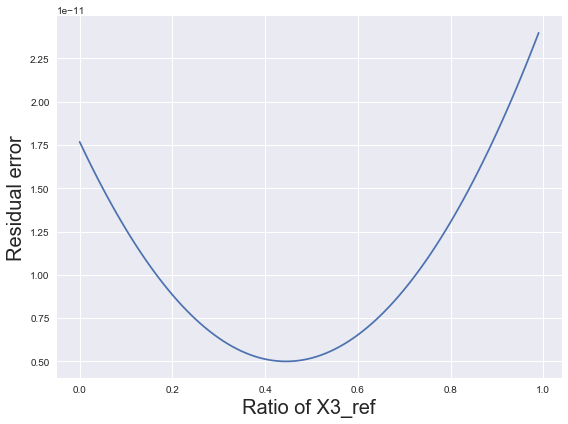

In [284]:
ratio = ratio = np.arange(0,1,0.01)
residuals = np.zeros((len(array),len(ratio)))

globalMin = 10
globalratio = 0
for j in range(0, len(ratio)):
    for i in range(0, len(array)):
        p0, res, ran, sing, rc = np.polyfit(array[i]['I1w'][0:-2]**3,
                                                        array[i]['X3'][0:-2] - array[i]['X3_ref'][0:-2] * ratio[j],
                                                        1, 
                                                        full = True)
        residuals[i,j] = res
    cur_residual = np.sum(residuals[:,j])
    if cur_residual < globalMin:
        globalMin = cur_residual
        globalratio = ratio[j]
f2, ax = plt.subplots(1,1,figsize = (8,6))
ax.plot(ratio, np.sum(residuals, axis = 0))
ax.set_xlabel('Ratio of X3_ref', fontsize = 20)
ax.set_ylabel('Residual error', fontsize = 20)
plt.tight_layout()
print(f'The minimum residual is {globalMin}', f'The ratio for minimum residual is {globalratio}', sep = '\n')
f2.savefig('200416\\200416_glass_R56_power_dep_ratio_residual.jpg', dpi = 300)

In [269]:
ratio = np.arange(0,1,0.01)
globalMin = 10
globali = 0

for j in range(0,len(ratio)):
    cur_residuals = 0
    for i in range(0, len(array)):
        p, residuals, rank, singular_values, rcond = np.polyfit(array[i]['I1w'][0:-2]**3,
                                                            array[i]['X3'][0:-2] - array[i]['X3_ref'][0:-2] * ratio[j], 
                                                            1, 
                                                            full = True)
        cur_residuals += residuals[0]
    if cur_residuals < globalMin:
        globali = j
        globalMin = cur_residuals
print(f"The ratio of X3_ref signals that when subtracting creates the least residual error is : {ratio[globali]}") 
print(f"And the residual is : {round(globalMin,17)}")

The ratio of X3_ref signals that when subtracting creates the least residual error is : 0.45
And the residual is : 5.00026e-12


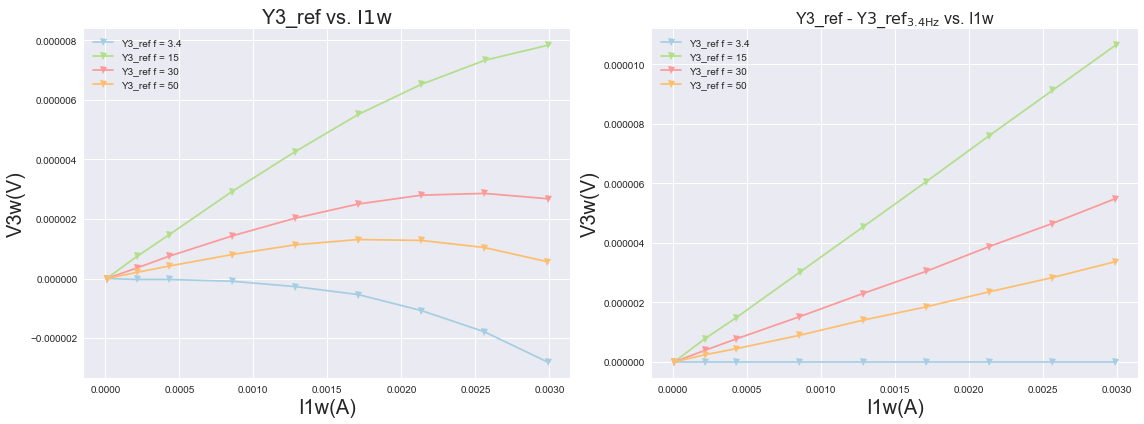

In [323]:
f4, axs = plt.subplots(1,2,figsize = (16,6))
# for i in range(0, len(array)):
#     axs[0].plot(array[i]['I1w'][0:-2], array[i]['X3_ref'][0:-2], 
#                   marker = 'o', label = f"X3_ref f = {freq[i]}", c = cmap[i * 2 + 1])
for i in range(0, len(array)):
    axs[0].plot(array[i]['I1w'][0:-2], array[i]['Y3_ref'][0:-2], 
                  marker = 'v', label = f"Y3_ref f = {freq[i]}", c = cmap[i * 2])
axs[0].legend()
axs[0].set_xlabel('I1w(A)',fontsize = 20)
axs[0].set_ylabel('V3w(V)', fontsize = 20)
axs[0].set_title(r'Y3_ref vs. $\rm{I1w}$', fontsize = 20)

for i in range(0, len(array)):
    axs[1].plot(array[i]['I1w'][0:-2], array[i]['Y3_ref'][0:-2] - array[0]['Y3_ref'][0:-2], 
                  marker = 'v', label = f"Y3_ref f = {freq[i]}", c = cmap[i * 2])
axs[1].legend()
axs[1].set_xlabel('I1w(A)',fontsize = 20)
axs[1].set_ylabel('V3w(V)', fontsize = 20)
axs[1].set_title(r'Y3_ref - $\rm{Y3\_ref_{3.4Hz}}$ vs. I1w', fontsize = 16)
plt.tight_layout()

#f4.savefig('200416\\200416_glass_R56_power_dep_Y3_ref_vs_I1w.jpg', dpi = 300)

In [324]:
array[0].head()

,Date,time,Time,V_input,X1,Y1,X1_ref,Y1_ref,X3,Y3,X3_ref,Y3_ref,I1w,Freq
0,2020-04-16,16:44:13.023500,371.352240,0.004,0.000336,0.000000,0.000320,0.000000,-2.980250e-08,0.000000e+00,0.000000,0.000000e+00,0.000008,3.4
1,2020-04-16,16:50:29.511034,747.840774,0.100,0.008598,0.000000,0.008553,-0.000008,2.205390e-06,-2.980250e-08,0.000004,-2.980250e-08,0.000214,3.4
2,2020-04-16,16:56:45.977566,1124.307307,0.200,0.017181,0.000000,0.017098,-0.000023,2.443800e-06,0.000000e+00,0.000004,-2.980250e-08,0.000427,3.4
3,2020-04-16,17:03:02.438099,1500.766839,0.400,0.034348,0.000000,0.034142,-0.000046,1.877550e-06,5.960510e-08,0.000004,-8.940740e-08,0.000854,3.4
4,2020-04-16,17:09:18.905631,1877.234372,0.600,0.051499,-0.000008,0.051148,-0.000061,5.960510e-08,2.384200e-07,0.000003,-2.682230e-07,0.001281,3.4


In [11]:
data = pd.read_csv('200416\\200416_glass_R65_3w_V1p0.txt', sep = " ")
data.head()

,Date,time,Time,TC,SENS,Lockin1f,Lockin2f,X3,Y3,X3_ref,Y3_ref
0,2020-04-16,17:21:51.875699,2630.205439,1,1,3.4,3.4,-0.000004,1.043090e-06,0.000008,-0.000001
1,2020-04-17,11:54:50.116196,2629.992427,1,1,15.0,15.0,-0.000003,1.072890e-06,0.000007,0.000007
2,2020-04-17,13:25:33.551542,2630.087432,1,1,30.0,30.0,-0.000003,1.043090e-06,0.000007,0.000003
3,2020-04-17,14:56:28.693559,2630.018428,1,1,50.0,50.0,-0.000002,9.834840e-07,0.000007,0.000001


In [13]:
Re0 = 40.20 #old R56 value
V1w = np.mean([0.0858006,0.0858769,0.08581590, 0.0857778])
Rname = 'R56_2'

In [14]:
I1w = V1w / Re0
alpha = (0.002015 + 0.002005 + 0.001989 + 0.001988) / 4
L = 1.83e-3
C = 2.11e6
b = 10e-6 #half heater line width
r = 0.5772

In [15]:
X3_offset = 1.2724e-6 #intercept from power dependence 3w analysis
data.X3_off = data.X3 - X3_offset
P_per_m = V1w**2 / (Re0 * L) #power / unit length
data.T_avg_real = data.X3_off / (-1/2 * alpha * V1w * P_per_m)
data.T_avg_im = data.Y3 / (-1/2 * alpha * V1w * P_per_m)
ydata = data.T_avg_real 
xdata = data.Lockin1f

In [130]:
def V3w_real(f, detk, p0):
    T_avg_real = 1 / (np.pi * np.sqrt(detk)) * (- 0.5 * np.log(b**2 * 2 * 2 * np.pi * f * C * p0) + 3 / 2 - r)
    return T_avg_real
def V3w_imag(f, detk):
    #T_avg_img = 1 / (np.pi * np.sqrt(detk)) * (- np.pi / 4)
    T_avg_img = - 1 / (4 * np.sqrt(detk))
    return T_avg_img

In [364]:
popt, pcov = curve_fit(V3w_real, xdata, ydata)

In [365]:
popt

array([ 3.62660003,  0.30212526])

In [177]:
fits_X3 = {}
s = 5
x = np.zeros(len(array[0]['V_input'][s:-2]))
y = np.zeros(len(array[0]['V_input'][s:-2]))
for i in range(0, len(array[0]['V_input'][s:-2])):
    v_input = array[0]['V_input'][s + i]
    for j in range(0, len(array)):
        x[j] = array[j]['Freq'][s + i]
        y[j] = V3w_to_T_avg(array[j]['X3'][s + i] - X3_offset, array[j]['X1'][s + i])
    fits_X3[v_input] = curve_fit(V3w_real, x, y)
fits_X3

array([ 0.65894855,  0.53380474,  0.47671348,  0.43655522])

Mean detk fit by X3 = 3.615149943495213
Mean kxx fit by X3 = 0.27233234014006724


1.5363475177304966

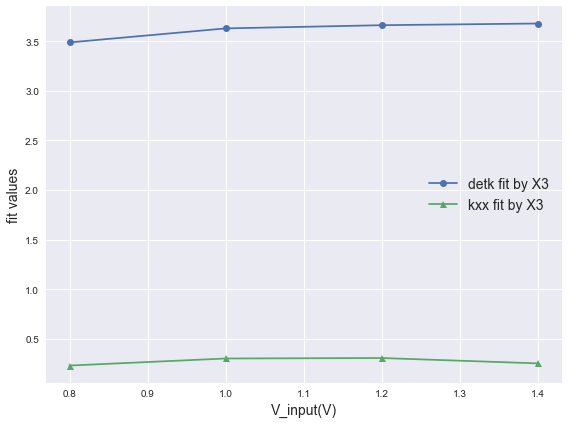

In [176]:
fig2, ax = plt.subplots(1,1, figsize = (8,6))
plotx = array[0]['V_input'][5:-2]
plotdetk = [fits_X3[i][0][0] for i in plotx]
plotkxx = [fits_X3[i][0][1] for i in plotx]
ax.plot(plotx, plotdetk, marker = 'o', label = 'detk fit by X3')
ax.plot(plotx, plotkxx, marker = '^', label = 'kxx fit by X3')
ax.set_xlabel('V_input(V)', fontsize = 14)
ax.set_ylabel('fit values', fontsize = 14)
ax.legend(fontsize = 14)
plt.tight_layout()
print(f'Mean detk fit by X3 = {np.mean(plotdetk)}')
print(f'Mean kxx fit by X3 = {np.mean(plotkxx)}')
fig2.savefig('200416\\200416_glass_R56_power_detk_fitting_X3_all.jpg', dpi = 300)
1.733 / 1.128

In [39]:
def Y3_fit_detk(T_avg_img):
    detk = 1 / (16 * T_avg_img**2)
    return detk

detk_Y3 = Y3_fit_detk(data.T_avg_im)

def V3w_to_T_avg(V3, V1w):
    P_per_m = V1w**2 / (Re0 * L)
    T_avg = V3 / (-1/2 * alpha * V1w * P_per_m)
    return T_avg

def T_avg_to_V3w(T_avg):
    V3 = T_avg * (-1/2 * alpha * V1w * P_per_m)
    return V3
detk_Y3

0    4.236631
1    4.004551
2    4.236631
3    4.765732
Name: Y3, dtype: float64

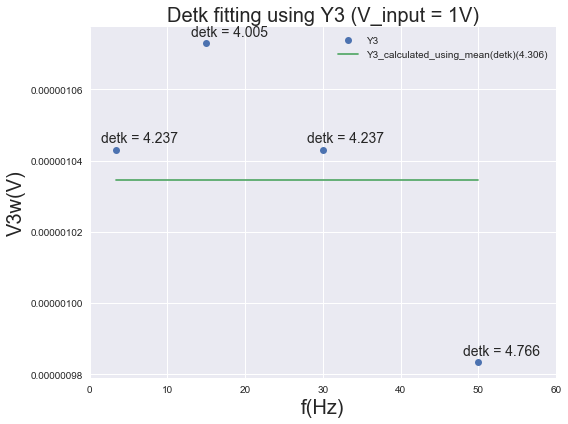

In [455]:
f5, ax = plt.subplots(1,1,figsize = (8,6))
ax.plot(data.Lockin1f, data.Y3, linestyle = "", marker = 'o', label = 'Y3')
mean_sdetk = np.mean(sdetk_Y3)
T_avg_img = V3w_imag(data.Lockin1f, [mean_sdetk**2]*4)
Y3_exp = T_avg_to_V3w(T_avg_img)
ax.plot(data.Lockin1f, Y3_exp, label = f'Y3_calculated_using_mean(detk)({round(mean_sdetk**2,3)})')
plt.legend()
ax.set_xlabel('f(Hz)', fontsize = 20)
ax.set_ylabel('V3w(V)', fontsize = 20)
ax.set_xlim([0,60])
for i in range(0, len(data.Y3)):
    ax.annotate(['detk = ' + str(round(i**2,3)) for i in sdetk_Y3][i], (data.Lockin1f[i] - 2, data.Y3[i]+2*1e-9),
               fontsize = 14)
ax.set_title('Detk fitting using Y3 (V_input = 1V)',fontsize = 20)
plt.tight_layout()
#f5.savefig('200416\\200416_glass_R56_power_detk_fitting_Y3_V1p0.jpg', dpi = 300)

In [35]:
array[3][array[3]['V_input'] == 0.4]['Y3']

3    2.980250e-08
Name: Y3, dtype: float64

In [40]:
for a in array: 
    T_avg_im = V3w_to_T_avg(a['Y3'], a['X1'])
    a['detk_Y3'] = Y3_fit_detk(T_avg_im)

In [49]:
array[2].head()

,Date,time,Time,V_input,X1,Y1,X1_ref,Y1_ref,X3,Y3,X3_ref,Y3_ref,I1w,Freq,detk_Y3
0,2020-04-17,12:47:54.769347,371.306237,0.004,0.000343,0.000000,0.000336,0.000000,-2.980250e-08,0.000000e+00,-2.980250e-08,0.000000e+00,0.000009,30,inf
1,2020-04-17,12:54:11.208878,747.744768,0.100,0.008598,0.000000,0.008545,0.000000,2.205390e-06,-2.980250e-08,3.993540e-06,3.576300e-07,0.000214,30,0.005250
2,2020-04-17,13:00:27.659410,1124.196300,0.200,0.017197,-0.000008,0.017075,0.000008,2.443800e-06,0.000000e+00,4.172350e-06,7.450620e-07,0.000428,30,inf
3,2020-04-17,13:06:44.113942,1500.650832,0.400,0.034363,-0.000015,0.034111,0.000015,1.996770e-06,5.960510e-08,3.963740e-06,1.430520e-06,0.000855,30,5.347854
4,2020-04-17,13:13:00.593476,1877.129365,0.600,0.051514,-0.000023,0.051110,0.000031,3.874320e-07,2.086170e-07,3.039850e-06,2.026570e-06,0.001281,30,4.955040


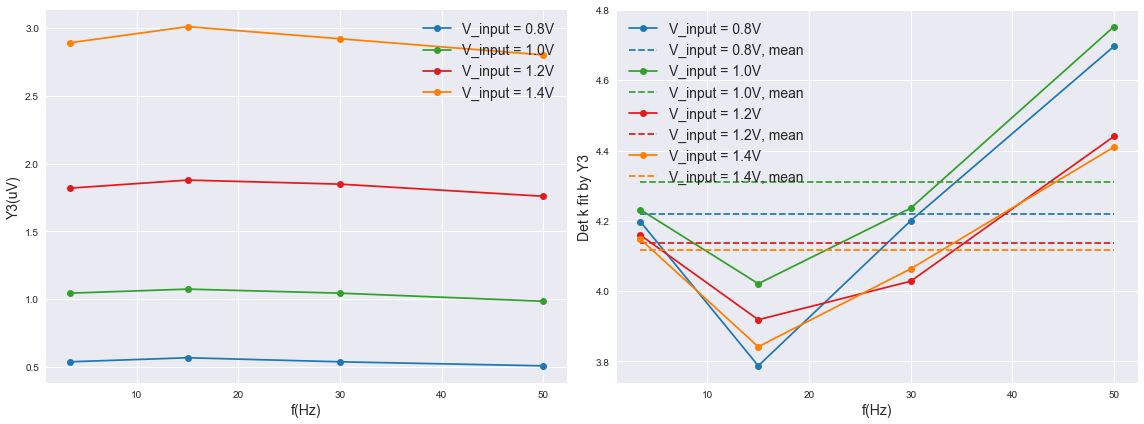

In [118]:
fig, ax = plt.subplots(1,2, figsize = (16,6))
x = np.empty(4)
y = np.empty(4)
Y3 = np.empty(4)
for j in range(5, len(array[0]['V_input']) - 2):
    for i in range(0, len(freq)):
        v = array[i]['V_input'][j]
        mask = array[i]['V_input'] == v
        x[i] = array[i][mask]['Freq']
        y[i] = array[i][mask]['detk_Y3']
        Y3[i] = array[i][mask]['Y3'] * 1e6
    ax[1].plot(x, y, label = f"V_input = {v}V", marker = 'o', color = cmap[(j - 5) * 2 + 1])
    ax[1].plot(x, [y.mean()]*4, linestyle = '--', label = f"V_input = {v}V, mean", color = cmap[(j - 5) * 2 + 1])
    ax[0].plot(x, Y3, label = f"V_input = {v}V", marker = 'o', color = cmap[(j - 5) * 2 + 1])
ax[1].legend(fontsize = 14)
ax[1].set_xlabel('f(Hz)', fontsize = 14)
ax[1].set_ylabel('Det k fit by Y3', fontsize = 14)
ax[0].legend(fontsize = 14)
ax[0].set_xlabel('f(Hz)', fontsize = 14)
ax[0].set_ylabel('Y3(uV)', fontsize = 14)
plt.tight_layout()
fig.savefig('200416\\200416_glass_R56_power_detk_fitting_Y3_all.jpg', dpi = 300)

In [110]:
np.mean([np.mean(a['detk_Y3'][5:-2]) for a in array])

4.1957031247946279